In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
POPOL = 10000000
# caratteristiche del test
SENS = 0.97
SPEC = 0.97

In [38]:
# formule per caloclo componenti matrice di confusione
def calcola_conf_matrix(sens, spec, popol, prev):
    I = popol * prev        # infetti
    NI = popol * (1 - prev) # non infetti
    # converto ad int per arrotondare
    TP = int(sens * I)
    TN = int(spec * NI)
    FN = int(I - TP)
    FP = int(NI - TN)
    return (TP, TN, FP, FN)

In [56]:
def calcola_ppv(sens, spec, popol, prev):
    I = popol * prev        # infetti
    NI = popol * (1 - prev) # non infetti
    # converto ad int per arrotondare
    TP = int(sens * I)
    TN = int(spec * NI)
    FP = int(NI - TN)
    ppv = TP/(TP + FP)
    return ppv

In [50]:
# Roma 3%
PREV = 0.03

tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, PREV)

In [51]:
print((tp, tn, fp, fn))

(291000, 9409000, 291000, 9000)


In [41]:
PREV = 0.2

tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, PREV)

In [42]:
print((tp, tn, fp, fn))

(1940000, 7760000, 240000, 60000)


In [43]:
PREV = 0.3

tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, PREV)

In [44]:
print((tp, tn, fp, fn))

(2910000, 6790000, 210000, 90000)


In [45]:
vet_prev = np.arange(start=0.01, stop=0.9, step=0.01)

In [46]:
list_ratio = []

for x_prev in vet_prev:
    tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, x_prev)
    ratio = round(fp/tp, 3)
    list_ratio.append(ratio)

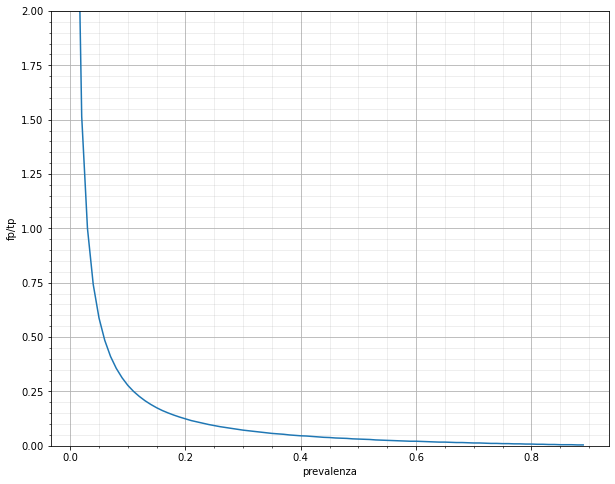

In [52]:
plt.figure(figsize=(10,8))
plt.ylim(0, 2)
plt.plot(vet_prev, list_ratio)
plt.xlabel('prevalenza')
plt.ylabel('fp/tp')
plt.grid();
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2);

In [61]:
vet_prev = np.arange(start=0.01, stop=0.9, step=0.01)

list_ppv = []

for x_prev in vet_prev:
    ppv = calcola_ppv(SENS, SPEC, POPOL, x_prev)
    list_ppv.append(ppv)

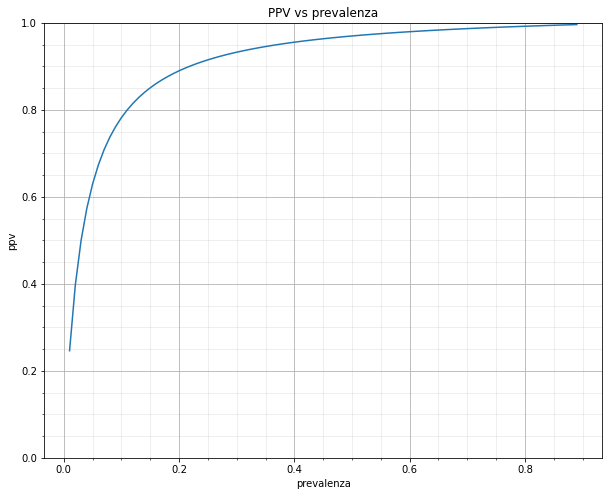

In [62]:
plt.figure(figsize=(10,8))
plt.title('PPV vs prevalenza')
plt.ylim(0, 1)
plt.plot(vet_prev, list_ppv)
plt.xlabel('prevalenza')
plt.ylabel('ppv')
plt.grid();
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)